# Carga e Análise - Análise Descritiva
A análise descritiva é a primeira etapa de uma análise de dados. Ela resume e organiza os dados de forma clara, ajudando  a entender o que está acontecendo no  conjunto de dados, sem tirar conclusões causais.

```
Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.
```

In [3]:
# Import das bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, MetaData, Table, inspect
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Engine para conexão com o banco de dados
engine = create_engine('sqlite:///clened_telecomX_db/teleconX_db.db')

In [31]:
# Exibindo as tabelas do banco
print(inspect(engine).get_table_names())

['teleconX_BR', 'teleconX_origin']


In [32]:
# Carregando a tabela a ser analisada em um dataframe pandas
df = pd.read_sql_table('teleconX_BR', con=engine)

# amostra de 5 linhas aleatórias
df.sample(5)

,id_cliente,contrato_cancelado,sexo,igual_maior_65,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,custo_diario,valor_mensal,valor_total
2285,3186-BAXNB,1,feminino,0,0,0,1,1,0,fibra optica,...,0,1,1,0,mensal,0,cheque eletrônico,3.056667,91.70,91.70
4566,6258-NGCNG,0,masculino,0,0,0,7,1,1,sem serviço,...,-1,-1,-1,-1,mensal,0,cheque via correios,0.783333,23.50,173.00
5610,7663-RGWBC,1,masculino,0,0,0,1,1,0,dsl-cabo,...,0,0,0,0,mensal,1,cheque via correios,1.471667,44.15,44.15
5498,7537-CBQUZ,0,masculino,1,0,0,63,1,1,fibra optica,...,1,0,1,1,mensal,1,tranferência bancária automática,3.646667,109.40,7031.45
5656,7722-VJRQD,0,masculino,0,1,1,72,0,-1,dsl-cabo,...,1,1,1,1,dois anos,0,tranferência bancária automática,2.031667,60.95,4549.05


A coluna __id_cliente__ não terá importância para essa análise nesse momento, então ela será excluída.

In [8]:
df.drop(columns='id_cliente', inplace=True)

##### Reverificando os tipos


In [30]:
df.dtypes

contrato_cancelado        int64
sexo                     object
igual_maior_65            int64
tem_parceiro              int64
tem_dependente            int64
meses_contrato            int64
servicos_telefonicos      int64
multiplas_linhas          int64
servicos_internet        object
seguranca_online          int64
backup_online             int64
seguro_protecao           int64
suporte_tecnico           int64
tem_tv_cabo               int64
tem_streaming_filmes      int64
tipo_contrato            object
fatura_online             int64
forma_pagamento          object
custo_diario            float64
valor_mensal            float64
valor_total             float64
dtype: object

Algumas colunas que foram salva como categóricas, estão como object. 

In [37]:
to_category = df.select_dtypes(include='object').columns.tolist()
df[to_category] = df[to_category].astype('category')


In [38]:
df.dtypes

contrato_cancelado         int64
sexo                    category
igual_maior_65             int64
tem_parceiro               int64
tem_dependente             int64
meses_contrato             int64
servicos_telefonicos       int64
multiplas_linhas           int64
servicos_internet       category
seguranca_online           int64
backup_online              int64
seguro_protecao            int64
suporte_tecnico            int64
tem_tv_cabo                int64
tem_streaming_filmes       int64
tipo_contrato           category
fatura_online              int64
forma_pagamento         category
custo_diario             float64
valor_mensal             float64
valor_total              float64
dtype: object

In [39]:
for col in df.columns.tolist():
    if df[col].nunique() < 50:
        print(f'{col} => {df[col].unique()}')

contrato_cancelado => [ 0  1 -1]
sexo => ['feminino', 'masculino']
Categories (2, object): ['feminino', 'masculino']
igual_maior_65 => [0 1]
tem_parceiro => [1 0]
tem_dependente => [1 0]
servicos_telefonicos => [1 0]
multiplas_linhas => [ 0  1 -1]
servicos_internet => ['dsl-cabo', 'fibra optica', 'sem serviço']
Categories (3, object): ['dsl-cabo', 'fibra optica', 'sem serviço']
seguranca_online => [ 0  1 -1]
backup_online => [ 1  0 -1]
seguro_protecao => [ 0  1 -1]
suporte_tecnico => [ 1  0 -1]
tem_tv_cabo => [ 1  0 -1]
tem_streaming_filmes => [ 0  1 -1]
tipo_contrato => ['anual', 'mensal', 'dois anos']
Categories (3, object): ['anual', 'dois anos', 'mensal']
fatura_online => [1 0]
forma_pagamento => ['cheque via correios', 'cheque eletrônico', 'cartão de crédito automático', 'tranferência bancária automática']
Categories (4, object): ['cartão de crédito automático', 'cheque eletrônico', 'cheque via correios', 'tranferência bancária automática']


In [40]:
df.head()

,contrato_cancelado,sexo,igual_maior_65,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,seguranca_online,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,custo_diario,valor_mensal,valor_total
0,0,feminino,0,1,1,9,1,0,dsl-cabo,0,...,0,1,1,0,anual,1,cheque via correios,2.186667,65.6,593.30
1,0,masculino,0,0,0,9,1,1,dsl-cabo,0,...,0,0,0,1,mensal,0,cheque via correios,1.996667,59.9,542.40
2,1,masculino,0,0,0,4,1,0,fibra optica,0,...,1,0,0,0,mensal,1,cheque eletrônico,2.463333,73.9,280.85
3,1,masculino,1,1,0,13,1,0,fibra optica,0,...,1,0,1,1,mensal,1,cheque eletrônico,3.266667,98.0,1237.85
4,1,feminino,1,1,0,3,1,0,fibra optica,0,...,0,1,1,0,mensal,1,cheque via correios,2.796667,83.9,267.40


Utilizando o método describe para um primeiro insight das colunas numéricas

In [41]:
df.describe()

,contrato_cancelado,igual_maior_65,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,seguranca_online,backup_online,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_streaming_filmes,fatura_online,custo_diario,valor_mensal,valor_total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.226366,0.162653,0.484106,0.300124,32.346498,0.902711,0.324481,0.068391,0.127013,0.125224,0.071969,0.166369,0.169946,0.593230,2.157337,64.720098,2277.182035
std,0.486627,0.369074,0.499782,0.458343,24.571773,0.296371,0.643295,0.706329,0.738968,0.738062,0.708503,0.757553,0.759119,0.491265,1.004319,30.129572,2268.648587
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.608333,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833,35.425000,396.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.343333,70.300000,1389.200000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.995833,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333,118.750000,8684.800000


### % de clientes que __Cancelaram__ o serviço

É muito importante para uma análise inicial saber a quantidade ou no caso a porcentagem de clientes que deixaram a empresa. Isso me ajudará a entender que análises fazer apartir de então

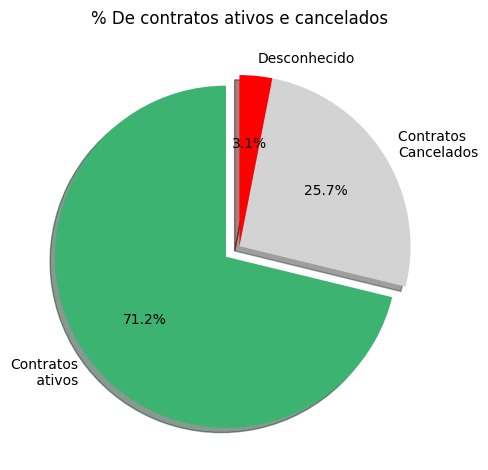

In [42]:
per_cancelados = df['contrato_cancelado'].value_counts()

labels_pie = ['Contratos\n ativos', 'Contratos \nCancelados', 'Desconhecido']
explode = [0.1, 0, 0]

per_cancelados.plot(kind='pie', labels=labels_pie,autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'lightgray', 'red'], explode=explode, shadow=True)

plt.title("% De contratos ativos e cancelados")
plt.ylabel('')  
plt.tight_layout()

plt.ylabel("")
plt.show()

Do total de contratos registrados, 25,7% cancelaram seus serviços. Com essa informação, vou buscar entender se existe um padrão no tipo de cliente que optou por se desligar da empresa.

Vou criar um novo dataframe apenas com os clientes que cancelaram o serviço

In [46]:
cancel = df[df['contrato_cancelado']== 1]

In [47]:
cancel.sample(5)

,contrato_cancelado,sexo,igual_maior_65,tem_parceiro,tem_dependente,meses_contrato,servicos_telefonicos,multiplas_linhas,servicos_internet,seguranca_online,...,seguro_protecao,suporte_tecnico,tem_tv_cabo,tem_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,custo_diario,valor_mensal,valor_total
1768,1,masculino,0,0,0,1,1,0,fibra optica,0,...,0,0,1,0,mensal,1,cheque eletrônico,2.650000,79.50,79.5
2361,1,feminino,1,1,0,1,1,0,fibra optica,0,...,0,0,0,0,mensal,1,cheque via correios,2.546667,76.40,76.4
4082,1,masculino,0,0,0,22,1,1,fibra optica,1,...,0,0,1,1,mensal,1,cheque eletrônico,3.358333,100.75,2095.0
6738,1,feminino,0,0,0,1,1,1,fibra optica,0,...,0,0,0,1,mensal,1,cheque eletrônico,2.833333,85.00,85.0
548,1,masculino,1,0,0,9,1,1,fibra optica,0,...,1,0,1,1,mensal,1,cheque eletrônico,3.350000,100.50,918.6


In [50]:
df['sexo'].value_counts()

sexo
masculino    3675
feminino     3592
Name: count, dtype: int64

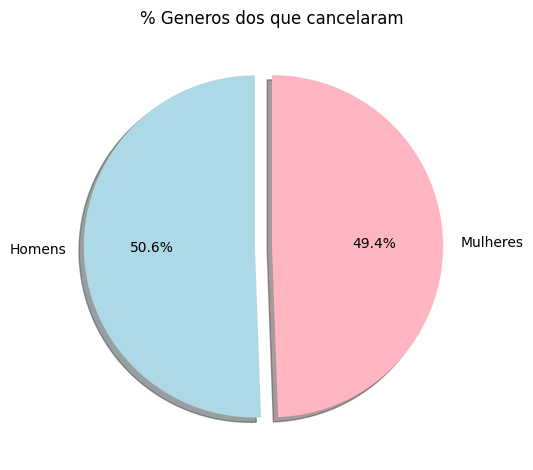

In [59]:
gender_cancelados = df['sexo'].value_counts()

labels_pie = ['Homens', 'Mulheres']
explode = [0.1, 0]

gender_cancelados.plot(kind='pie', labels=labels_pie,autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'], explode=explode, shadow=True)

plt.title("% Generos dos que cancelaram")
plt.ylabel('')  
plt.tight_layout()

plt.ylabel("")
plt.show()

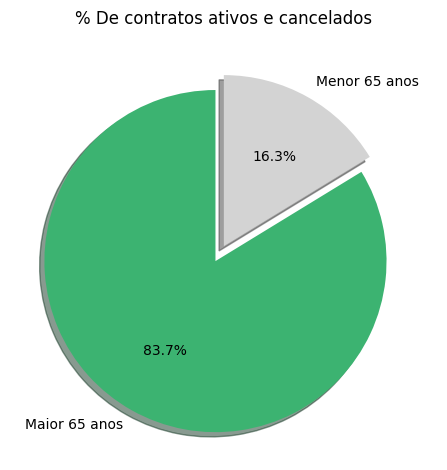

In [60]:
age_cancel = df['igual_maior_65'].value_counts()

labels_pie = ['Maior 65 anos', 'Menor 65 anos']
explode = [0.1, 0]

age_cancel.plot(kind='pie', labels=labels_pie,autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'lightgray', 'red'], explode=explode, shadow=True)

plt.title("% De contratos ativos e cancelados")
plt.ylabel('')  
plt.tight_layout()

plt.ylabel("")
plt.show()

In [98]:
tenure = cancel['meses_contrato'].value_counts(ascending=False).reset_index()#.head(12)

In [96]:
tenure


,meses_contrato,count
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
5,7,51
6,9,46
7,10,45
8,8,42
9,6,40


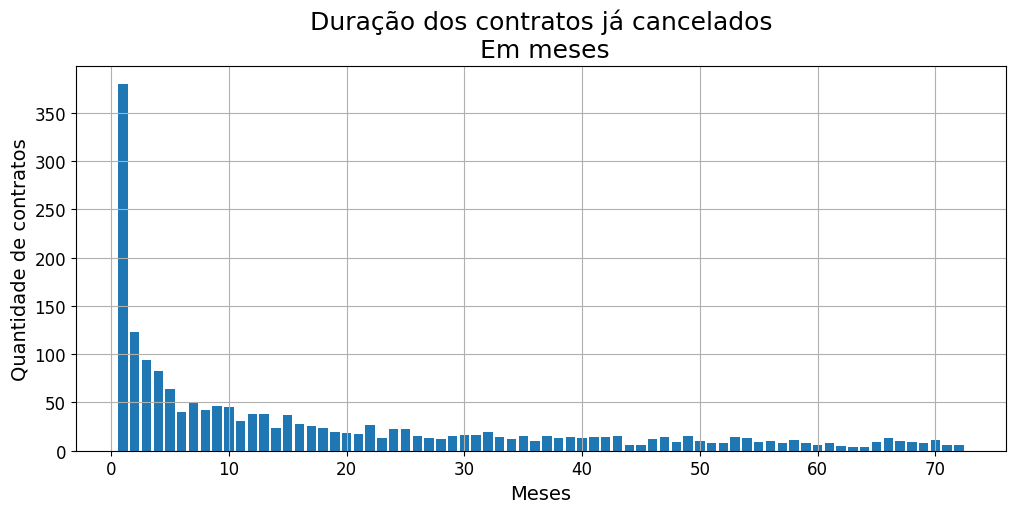

In [99]:

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(tenure['meses_contrato'], tenure['count'])

ax.set_title("Duração dos contratos já cancelados\n Em meses", fontsize=18)
ax.set_xlabel("Meses", fontsize=14)
ax.set_ylabel("Quantidade de contratos", fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid()

plt.show()

In [ ]:
ternure_until12 = cancel[cancel['meses_contrato'] <= 12]['meses_contrato'].value_counts().reset_index()

In [102]:
ternure_until12

,meses_contrato,count
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
5,7,51
6,9,46
7,10,45
8,8,42
9,6,40


In [ ]:
# do total de clientes, quantos cancelam antes de um ano